<a href="https://colab.research.google.com/github/Didilish/COVID-19-Recognition-on-Medical-Images-via-Neural-Networks/blob/main/Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setting hyper-parameters
batch_size = 64
#num_classes = 2
epochs = 20

In [3]:
#Load google drive folder
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
os.chdir("/content/drive/MyDrive/Deep Learning/Semester Project")
#load test and train data
import numpy as np
x_test = np.load('x_test.npy', mmap_mode='r')
x_train= np.load('x_train.npy', mmap_mode='r')
y_test = np.load('y_test.npy', mmap_mode='r')
y_train = np.load('y_train.npy', mmap_mode='r')

str(y_train[:,index])


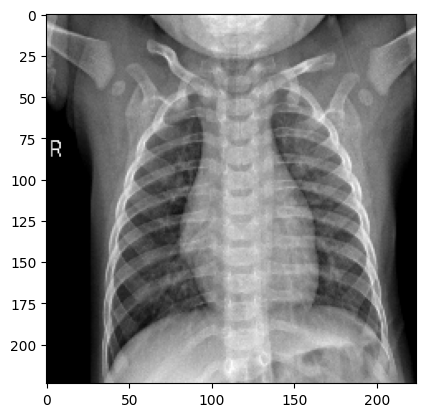

In [5]:
# Example of image
index = 75
plt.imshow(x_train[index])
#Output Example
print ('str(y_train[:,index])')

In [6]:
#Print the shape of the images for each input file
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (300, 224, 224, 3)
y_train shape (300,)
x_test shape (50, 224, 224, 3)
y_test shape (50,)


In [7]:
# compute the number of labels
num_labels1 = len(np.unique(x_train))
print('Number of classes for training samples is ', num_labels1)
num_labels2 = len(np.unique(y_train))
print('Number of classes for training samples is ', num_labels2)

Number of classes for training samples is  256
Number of classes for training samples is  2


In [8]:
print(y_test)

[0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
print("y_train unique:", np.unique(y_train))
print("y_test unique:", np.unique(y_test))

y_train unique: [0 1]
y_test unique: [0 1]


In [10]:
# Convert class vectors to binary class matrices.

# For example, for three classes, [0,0,1] -> 0, [0,1,0] -> 1, [1,0,0] -> 2
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


In [11]:
#building a CNN model
model = Sequential()

# First conv block
model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second conv block
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Dense layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 13.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


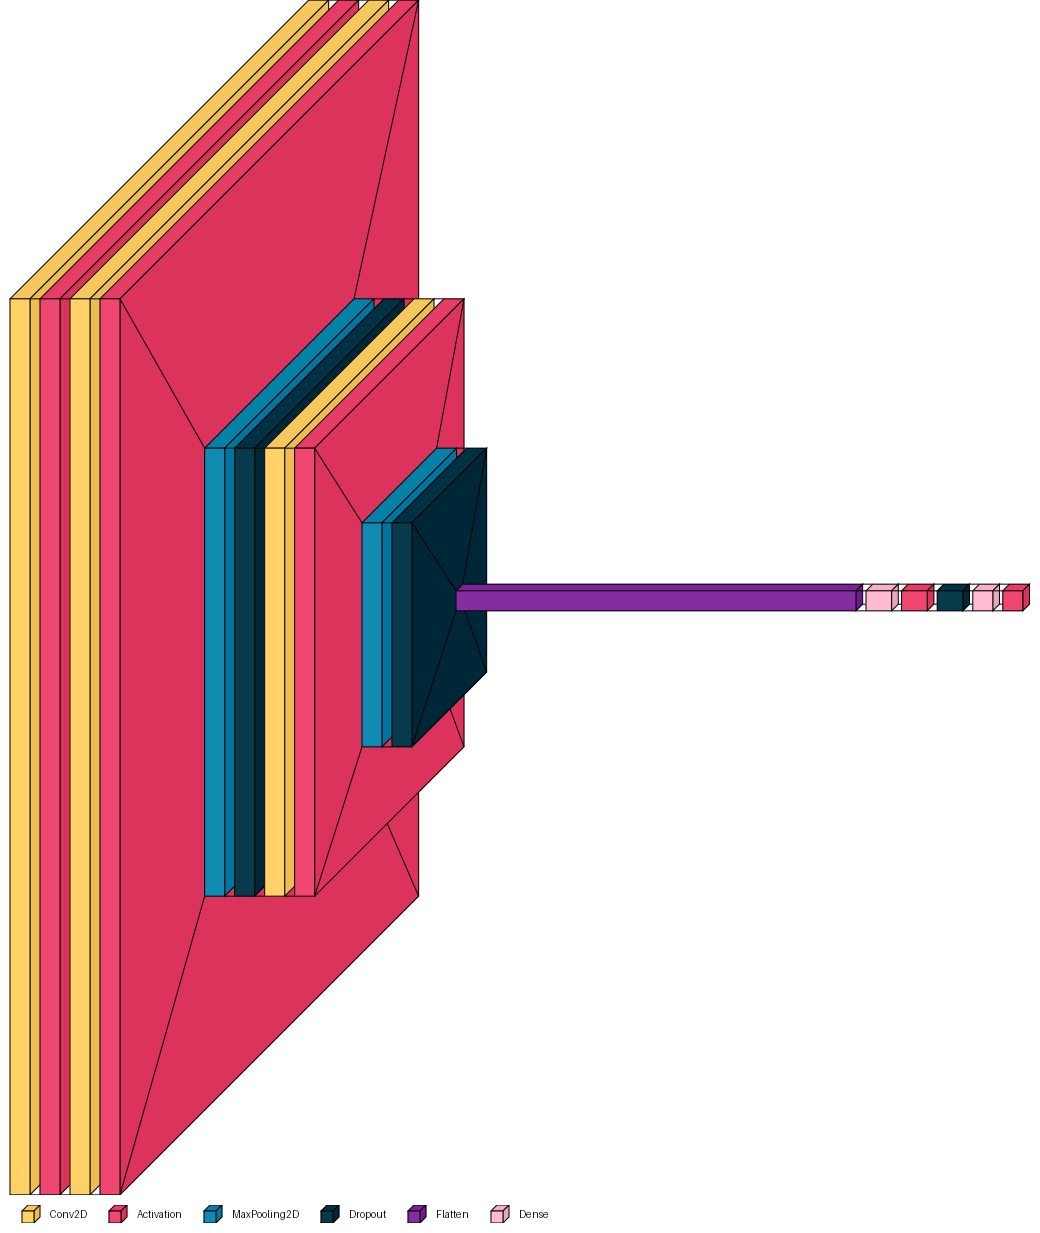

In [12]:
!pip install visualkeras
import visualkeras
import matplotlib.pyplot as plt

# Generate the layered view, and store it to an image file
visualkeras.layered_view(model, legend=True, draw_volume=True, to_file='output.png')

# Display the image with a specified width (in pixels)
from IPython.display import Image
display(Image(filename='output.png', width=500)) # Adjust the width as needed

In [13]:
#preprocessing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization
x_train /= 255
x_test /= 255

In [ ]:
# Start timer
start_time = time.time()

#Training
cat = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

# Calculate and print training time
training_time = time.time() - start_time
print(f"\nTotal training time: {training_time:.2f} seconds")

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 226s 41s/step - accuracy: 0.6068 - loss: 0.6846 - val_accuracy: 0.8400 - val_loss: 0.6275
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 248s 42s/step - accuracy: 0.8268 - loss: 0.5574 - val_accuracy: 0.8400 - val_loss: 0.4464
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 270s 42s/step - accuracy: 0.8290 - loss: 0.4984 - val_accuracy: 0.8400 - val_loss: 0.4380
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 254s 42s/step - accuracy: 0.8468 - loss: 0.4418 - val_accuracy: 0.8400 - val_loss: 0.4659
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 267s 43s/step - accuracy: 0.8151 - loss: 0.4874 - val_accuracy: 0.8400 - val_loss: 0.4937
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 257s 42s/step - accuracy: 0.8398 - loss: 0.4580 - val_accuracy: 0.8400 - val_loss: 0.4617
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 269s 43s/step - accuracy: 0.8401 - loss: 0.4459 - val_accuracy: 0.8400 - val_loss: 0.4455
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 211s 42s/step - accuracy: 0.8234 - loss: 0.4631 - val_accuracy: 0.8400 - val_loss:

In [ ]:
#Traning Scores
scores = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])

# Testing
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
predict = np.argmax(model.predict(x_test), axis=-1)


In [ ]:
#Convert y_test1 into a single column for scoring
y_test2 = y_test

#Generating pair_confusion_matrix
from sklearn.metrics import pair_confusion_matrix
pair_confusion_matrix(y_test2,predict)


In [ ]:
#Generating the metrics for evaluating the model
from sklearn.metrics import classification_report
print(classification_report(y_test2,predict))

In [18]:
print("Classification Report for Training Set:")
# Predict on the training set
train_predict = np.argmax(model.predict(x_train), axis=-1)
print(classification_report(y_train, train_predict)) # Compare with y_train

Classification Report for Training Set:
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       250
           1       0.00      0.00      0.00        50

    accuracy                           0.83       300
   macro avg       0.42      0.50      0.45       300
weighted avg       0.69      0.83      0.76       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


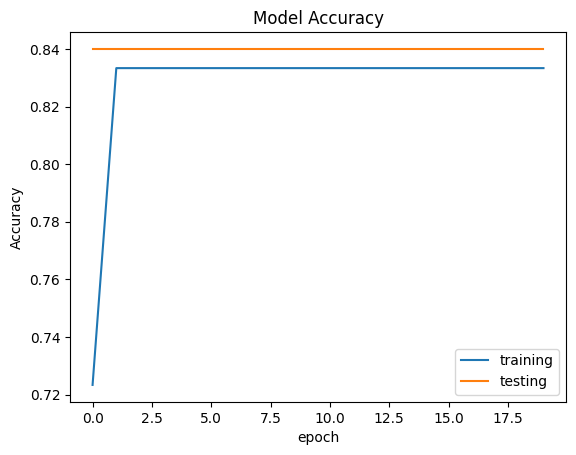

In [19]:
plt.plot(cat.history['accuracy'])
plt.plot(cat.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='lower right')
plt.show()

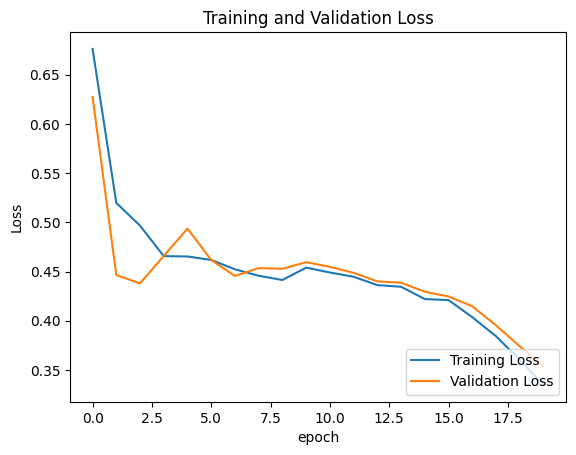

In [21]:
plt.plot(cat.history['loss'])
plt.plot(cat.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()